In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing dataset

In [2]:
data = pd.read_csv("house data.csv")

In [3]:
data.dropna(inplace = True)

In [4]:
data_encoded = pd.get_dummies(data)

In [33]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Locality     1005 non-null   object 
 5   Parking      1005 non-null   float64
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   object 
 8   Transaction  1005 non-null   object 
 9   Type         1005 non-null   object 
 10  Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 94.2+ KB


# Checking the null values in the dataset

In [35]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# Correlation matrix

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_24896\586960701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot =True,cmap='PiYG')


<Axes: >

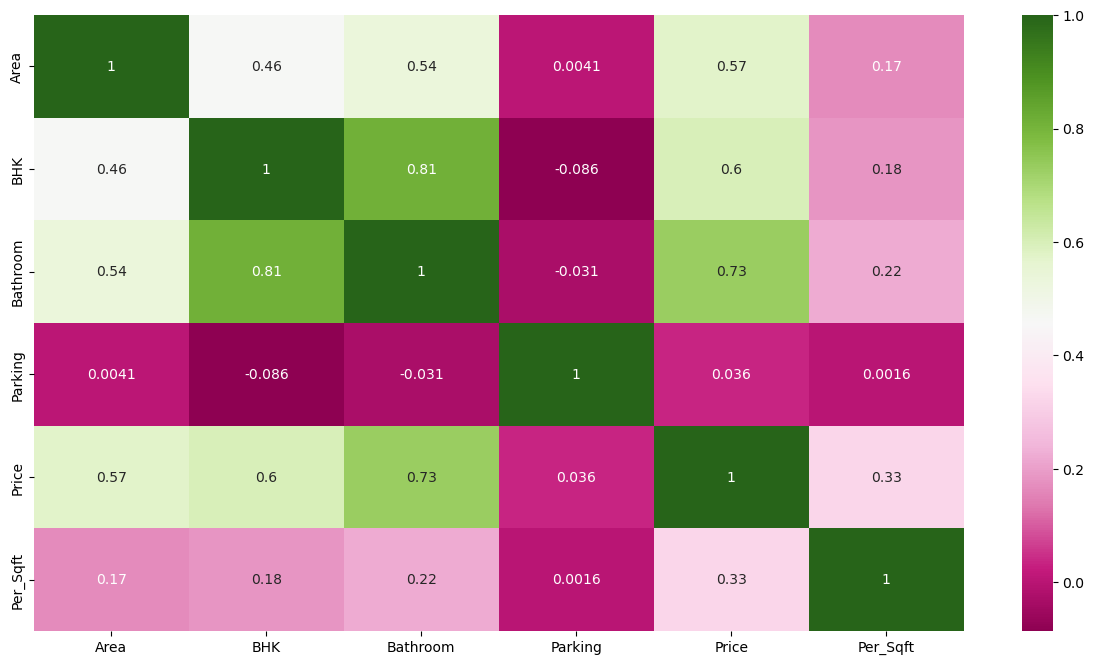

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot =True,cmap='PiYG')

In [9]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000
mean,1504.301968,2.791045,2.575124,1.697512,2.224030e+07,15663.630846
std,1729.104830,0.961469,1.088503,3.223118,2.771744e+07,21170.160448
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,770.000000,2.000000,2.000000,1.000000,5.130000e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.000000,1.400000e+07,11363.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,39.000000,2.400000e+08,183333.000000


In [10]:
corr_matrix=data.corr()
corr_matrix['Price'].sort_values(ascending=False)

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_24896\924245796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


Price       1.000000
Bathroom    0.732241
BHK         0.599587
Area        0.574410
Per_Sqft    0.325240
Parking     0.035894
Name: Price, dtype: float64

In [11]:
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions_sklearn = model_sklearn.predict(X_test)

In [13]:
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)
print("Mean Squared Error (scikit-learn):", mse_sklearn)

Mean Squared Error (scikit-learn): 6.809421959281704e+27


In [14]:
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    Dense(64, activation='relu'),
    Dense(1)
])

In [15]:
model_tf.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [36]:
history = model_tf.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
print(history.history)



Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 470949539348480.0000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 470453906833408.0000
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 470072829149184.0000
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 469577632841728.0000
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 469225646850048.0000
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 468513722466304.0000
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 468088822693888.0000
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 467893703671808.0000
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 467413204205568.0000
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 466856871723008.0000
Epoch 11/100
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 2ms/step - loss: 453126867910656.0000
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 453345240154112.0000
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 453338697039872.0000
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 453352722792448.0000
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 453144349769728.0000
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 453063752024064.0000
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 453005837074432.0000
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 453195620941824.0000
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 453013319712768.0000
Epoch 96/100
13/13 [==============================] - 0s 2ms/step - loss: 453358930362368.0000
Epoch 97/100
13/13 [==============================] - 0s 2ms/st

In [37]:
predictions_tf = model_tf.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [38]:
from sklearn.ensemble import RandomForestRegressor
random= RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
random.score(X_train , y_train)

0.9774673447823112

In [32]:
random.score(X_test , y_test)

0.8620416222781879